In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [3]:
annot_f = '/scratch/groups/mrivas/ukbb24983/exome/annotation/20201025_exome_oqfe_2020/ukb24983_exomeOQFE.annotation.compact.tsv.gz'
in_f    = '/scratch/groups/mrivas/ukbb24983/exome/gwas/master_phe_20201002_exomeOQFE/metal/ukb24983_exomeOQFE.HC382.metal.tsv.gz'


In [4]:
cat_or_zcat <- function(f){
    ifelse(endsWith(f, '.zst'), 'zstdcat', ifelse(endsWith(f, '.gz'), 'zcat', 'cat'))
}

fread_CHROM <- function(f, select=NULL){
    fread(cmd=paste(cat_or_zcat(f), f), colClasses = c('#CHROM'='character'), select=select) %>% rename('CHROM'='#CHROM')
}


In [5]:
annot_f %>% fread_CHROM() -> annot_df
in_f    %>% fread_CHROM() -> in_df


In [37]:
annot_df %>% colnames()

[1] "CHROM"                    "POS"                     
 [3] "ID"                       "REF"                     
 [5] "ALT"                      "FILTER"                  
 [7] "Allele"                   "Csq"                     
 [9] "Consequence"              "SYMBOL"                  
[11] "Gene"                     "HGVSp"                   
[13] "f_miss"                   "UKB_white_british_hwe_p" 
[15] "UKB_white_british_AF"     "UKB_AF"                  
[17] "CHROM_hg19"               "POS_hg19"                
[19] "REF_hg19"                 "ALT_hg19"                
[21] "liftOver_unmapped_reason"

In [10]:
in_df %>%
select(ID, BETA, P) %>%
left_join(
    annot_df, by='ID'
) -> df


In [11]:
df %>% colnames()

[1] "ID"                       "BETA"                    
 [3] "P"                        "CHROM"                   
 [5] "POS"                      "REF"                     
 [7] "ALT"                      "FILTER"                  
 [9] "Allele"                   "Csq"                     
[11] "Consequence"              "SYMBOL"                  
[13] "Gene"                     "HGVSp"                   
[15] "f_miss"                   "UKB_white_british_hwe_p" 
[17] "UKB_white_british_AF"     "UKB_AF"                  
[19] "CHROM_hg19"               "POS_hg19"                
[21] "REF_hg19"                 "ALT_hg19"                
[23] "liftOver_unmapped_reason"

In [32]:
max(in_df$OBS_CT)

[1] 184758

In [13]:
0.05/17000000

[1] 2.941176e-09

In [15]:
df %>%
filter(P <= 1e-9) -> df_1e9


In [16]:
df_1e9 %>% dim()

[1] 599  23

In [38]:
df_1e9 %>% 
mutate(ggrepel_label = if_else(abs(BETA) >= .2, SYMBOL, '')) %>%
ggplot(aes(
    x = log10(pmin(UKB_white_british_AF, 1-UKB_white_british_AF)),
    y = BETA,
    color = Csq,
    label=ggrepel_label
)) +
geom_hline(yintercept=0, color="gray") +
geom_point() +
ggrepel::geom_text_repel(size=3, force=4) +
theme_bw() + labs(
    color = 'Predicted consequence (VEP)',
    title='meta-analyzed (n = 184,758) EWAS hits (p <= 1e-9) for asthma (HC382)',
    x = 'log10(Minor allele frequency)',
    y = 'log(OR)'
) + 
theme(legend.position = 'bottom') -> p


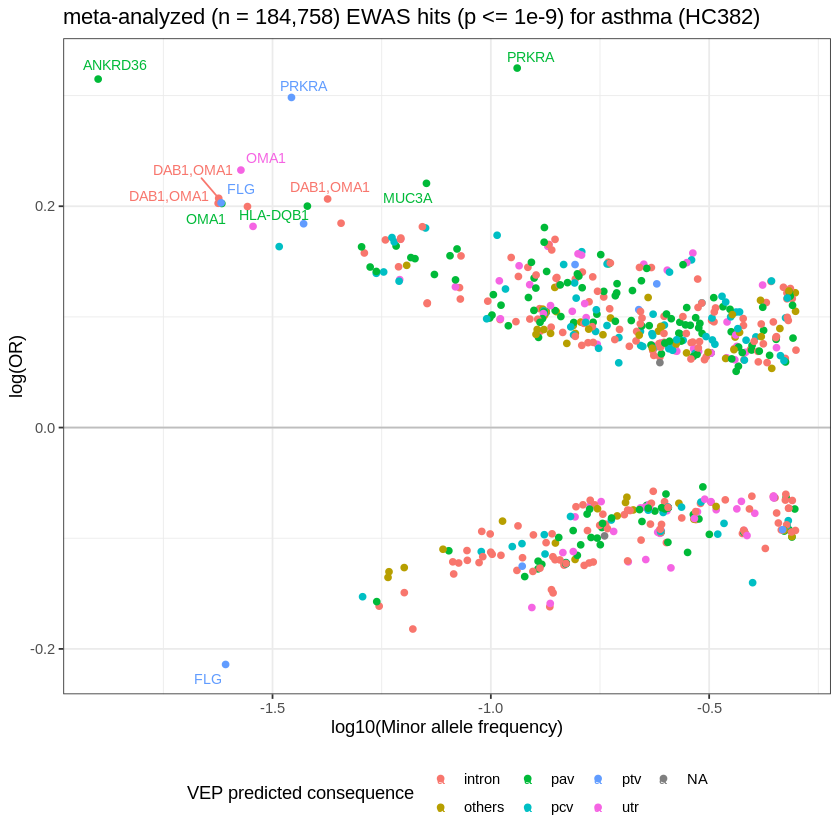

In [35]:
p 


In [39]:
ggsave('13_example_cascade_plot.HC382.png', p)

Saving 6.67 x 6.67 in image



In [40]:
ggsave('13_example_cascade_plot.HC382.pdf', p)

Saving 6.67 x 6.67 in image



_ANGPTL7_

In [42]:
bind_rows(
    annot_df %>% filter(SYMBOL == 'ANGPTL7') %>% head(2),
    annot_df %>% filter(SYMBOL == 'ANGPTL7') %>% tail(2)
)

CHROM,POS,ID,REF,ALT,FILTER,Allele,Csq,Consequence,SYMBOL,⋯,HGVSp,f_miss,UKB_white_british_hwe_p,UKB_white_british_AF,UKB_AF,CHROM_hg19,POS_hg19,REF_hg19,ALT_hg19,liftOver_unmapped_reason
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>
1,11189480,1:11189480:A:G,A,G,.,G,utr,5_prime_UTR_variant,ANGPTL7,⋯,NA,0.0006180131,0.500000,0.00000e+00,2.49353e-06,1,11249537,A,G,NA
1,11189482,1:11189482:C:T,C,T,.,T,utr,5_prime_UTR_variant,ANGPTL7,⋯,NA,0.0018689912,0.500005,1.08966e-05,1.99732e-05,1,11249539,C,T,NA
1,11195123,1:11195123:G:A,G,A,.,A,utr,3_prime_UTR_variant,ANGPTL7,⋯,NA,0.0014951930,0.500900,1.16163e-04,1.04820e-04,1,11255180,G,A,NA
1,11195123,1:11195123:G:C,G,C,.,C,utr,3_prime_UTR_variant,ANGPTL7,⋯,NA,0.0016995360,0.500000,3.63092e-06,2.49623e-06,1,11255180,G,C,NA


In [ ]:
1:11189480-11195123

In [44]:
paste(
        'tabix', '-h',
        '/scratch/groups/mrivas/ukbb24983/exome/gwas/freeze/master_phe_20201002_exomeOQFE_20201110/ukb24983_exomeOQFE.metal.p1e-3.tsv.gz',
        '1:11189480-11195123'
    )

[1] "tabix -h /scratch/groups/mrivas/ukbb24983/exome/gwas/freeze/master_phe_20201002_exomeOQFE_20201110/ukb24983_exomeOQFE.metal.p1e-3.tsv.gz 1:11189480-11195123"

In [46]:
'13_example_cascade_plot.ANGPTL7.tsv' %>%
fread_CHROM() -> ANGPTL7_df

In [52]:
ANGPTL7_df %>% colnames()

[1] "CHROM"          "POS"            "Variant_ID"     "Csq"           
 [5] "GBE_ID"         "population"     "REF"            "ALT"           
 [9] "A1"             "OBS_CT"         "BETA"           "SE"            
[13] "P"              "Direction"      "HetISq"         "HetChiSq"      
[17] "HetDf"          "HetPVal"        "SYMBOL"         "GBE_short_name"
[21] "Consequence"    "Gene"           "GBE_category"

In [54]:
ANGPTL7_df %>% filter(GBE_ID == 'INI5255')

CHROM,POS,Variant_ID,Csq,GBE_ID,population,REF,ALT,A1,OBS_CT,⋯,Direction,HetISq,HetChiSq,HetDf,HetPVal,SYMBOL,GBE_short_name,Consequence,Gene,GBE_category
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,11193627,1:11193627:G:T,pav,INI5255,metal,G,T,T,64443,⋯,---+?--,0,2.207,5,0.8198,ANGPTL7,"Intra-ocular pressure, Goldmann-correlated (R)",missense_variant,ENSG00000171819,Eye_measures


In [57]:
ANGPTL7_df %>% filter(GBE_ID == 'INI5255') %>%
select(Variant_ID, Csq, GBE_ID, BETA, SE, P, Direction, SYMBOL, GBE_short_name, Consequence, GBE_category)

Variant_ID,Csq,GBE_ID,BETA,SE,P,Direction,SYMBOL,GBE_short_name,Consequence,GBE_category
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1:11193627:G:T,pav,INI5255,-0.2339061,0.0327558,9.272e-13,---+?--,ANGPTL7,"Intra-ocular pressure, Goldmann-correlated (R)",missense_variant,Eye_measures


In [60]:
ANGPTL7_df %>% filter(GBE_category == 'Eye_measures') %>%
select(Variant_ID, Csq, GBE_ID, BETA, SE, P, Direction, SYMBOL, GBE_short_name, Consequence, GBE_category) %>%
filter(as.numeric(P) <= 1e-6)

Variant_ID,Csq,GBE_ID,BETA,SE,P,Direction,SYMBOL,GBE_short_name,Consequence,GBE_category
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1:11189808:G:A,pav,BIN5327,16.3809666,1.5898294,6.787e-25,???+?+,ANGPTL7,Ever had laser treatment for glaucoma or high eye pressure,missense_variant,Eye_measures
1:11189845:A:T,pav,BIN5327,17.6967000,2.2882700,1.045e-14,?????+,ANGPTL7,Ever had laser treatment for glaucoma or high eye pressure,missense_variant,Eye_measures
1:11193627:G:T,pav,INI5097,0.1938339,0.0342578,1.531e-08,++-+?++,ANGPTL7,6mm weak meridian (L),missense_variant,Eye_measures
1:11193627:G:T,pav,INI5098,0.1734179,0.0343484,4.446e-07,++-+?++,ANGPTL7,6mm weak meridian (R),missense_variant,Eye_measures
1:11193627:G:T,pav,INI5099,0.1603938,0.0324399,7.64e-07,++-+?++,ANGPTL7,3mm weak meridian (R),missense_variant,Eye_measures
1:11193627:G:T,pav,INI5134,0.1781968,0.0341889,1.867e-07,++++?++,ANGPTL7,6mm strong meridian (L),missense_variant,Eye_measures
1:11193627:G:T,pav,INI5254,-0.1857980,0.0324951,1.08e-08,-+-+?--,ANGPTL7,"Intra-ocular pressure, corneal-compensated (R)",missense_variant,Eye_measures
1:11193627:G:T,pav,INI5255,-0.2339061,0.0327558,9.272e-13,---+?--,ANGPTL7,"Intra-ocular pressure, Goldmann-correlated (R)",missense_variant,Eye_measures
1:11193627:G:T,pav,INI5262,-0.1656939,0.0325778,3.655e-07,-+-+?--,ANGPTL7,"Intra-ocular pressure, corneal-compensated (L)",missense_variant,Eye_measures


In [63]:
annot_df %>%
filter(ID == '1:11193627:G:T') %>%
select(-CHROM, -POS, -REF, -ALT, -FILTER, -Allele)

ID,Csq,Consequence,SYMBOL,Gene,HGVSp,f_miss,UKB_white_british_hwe_p,UKB_white_british_AF,UKB_AF,CHROM_hg19,POS_hg19,REF_hg19,ALT_hg19,liftOver_unmapped_reason
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>
1:11193627:G:T,pav,missense_variant,ANGPTL7,ENSG00000171819,ENSP00000366015.3:p.Gln175His,4.983977e-06,0.214468,0.00823666,0.00733147,1,11253684,G,T,NA


In [64]:
annot_df %>%
filter(ID %in% c('1:11194786:T:C', '1:11194951:T:C')) %>%
select(-CHROM, -POS, -REF, -ALT, -FILTER, -Allele)

ID,Csq,Consequence,SYMBOL,Gene,HGVSp,f_miss,UKB_white_british_hwe_p,UKB_white_british_AF,UKB_AF,CHROM_hg19,POS_hg19,REF_hg19,ALT_hg19,liftOver_unmapped_reason
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>
1:11194786:T:C,intron,intron_variant,"ANGPTL7,MTOR","ENSG00000198793,ENSG00000171819",NA,8.47276e-05,0.919176,0.0203179,0.0260908,1,11254843,T,C,NA
1:11194951:T:C,pcv,synonymous_variant,ANGPTL7,ENSG00000171819,ENSP00000366015.3:p.Tyr323%3D,0.00000e+00,0.973079,0.0203633,0.0263378,1,11255008,T,C,NA


In [62]:
ANGPTL7_df %>% filter(Variant_ID == '1:11193627:G:T') %>%
select(Variant_ID, Csq, GBE_ID, BETA, SE, P, Direction, SYMBOL, GBE_short_name, Consequence, GBE_category) %>%
filter(as.numeric(P) <= 1e-6)

Variant_ID,Csq,GBE_ID,BETA,SE,P,Direction,SYMBOL,GBE_short_name,Consequence,GBE_category
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1:11193627:G:T,pav,HC327,2.7310930,0.5291362,2.451e-07,-++++,ANGPTL7,Fracture metatarsal,missense_variant,Disease_outcome
1:11193627:G:T,pav,HC375,4.6474086,0.6505321,9.065e-13,-+++,ANGPTL7,Alcohol dependency,missense_variant,Disease_outcome
1:11193627:G:T,pav,HC1392,28.7874000,2.3062800,9.34e-36,+,ANGPTL7,TTE multiple gestation,missense_variant,Disease_outcome
1:11193627:G:T,pav,HC1412,23.7505000,2.3067300,7.332e-25,+,ANGPTL7,TTE obstructed labour due to malposition and malpresentation of foetus,missense_variant,Disease_outcome
1:11193627:G:T,pav,HC1425,26.1418000,2.3067100,9.013e-30,+,ANGPTL7,TTE single delivery by forceps and vacuum extractor,missense_variant,Disease_outcome
1:11193627:G:T,pav,INI5097,0.1938339,0.0342578,1.531e-08,++-+?++,ANGPTL7,6mm weak meridian (L),missense_variant,Eye_measures
1:11193627:G:T,pav,INI5098,0.1734179,0.0343484,4.446e-07,++-+?++,ANGPTL7,6mm weak meridian (R),missense_variant,Eye_measures
1:11193627:G:T,pav,INI5099,0.1603938,0.0324399,7.64e-07,++-+?++,ANGPTL7,3mm weak meridian (R),missense_variant,Eye_measures
1:11193627:G:T,pav,INI5134,0.1781968,0.0341889,1.867e-07,++++?++,ANGPTL7,6mm strong meridian (L),missense_variant,Eye_measures


In [51]:
ANGPTL7_df %>% filter(GBE_ID == 'HC276')

CHROM,POS,Variant_ID,Csq,GBE_ID,population,REF,ALT,A1,OBS_CT,⋯,Direction,HetISq,HetChiSq,HetDf,HetPVal,SYMBOL,GBE_short_name,Consequence,Gene,GBE_category
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,11189482,1:11189482:C:T,utr,HC276,metal,C,T,T,178888,⋯,++??+++,0.0,0.973,4,9.138e-01,ANGPTL7,Glaucoma,5_prime_UTR_variant,ENSG00000171819,Disease_outcome
1,11189883,1:11189883:T:A,pav,HC276,metal,T,A,A,16315,⋯,???-+?+,99.6,540.316,2,4.696e-118,ANGPTL7,Glaucoma,missense_variant,ENSG00000171819,Disease_outcome
1,11193658,1:11193658:C:T,pav,HC276,metal,C,T,T,168069,⋯,+????++,0.0,0.846,2,6.550e-01,ANGPTL7,Glaucoma,missense_variant,ENSG00000171819,Disease_outcome
1,11194982,1:11194982:C:T,pav,HC276,metal,C,T,T,179226,⋯,++??+++,0.0,2.382,4,6.660e-01,ANGPTL7,Glaucoma,missense_variant,ENSG00000171819,Disease_outcome


In [53]:
annot_df %>%
filter(ID == '1:11189883:T:A')

CHROM,POS,ID,REF,ALT,FILTER,Allele,Csq,Consequence,SYMBOL,⋯,HGVSp,f_miss,UKB_white_british_hwe_p,UKB_white_british_AF,UKB_AF,CHROM_hg19,POS_hg19,REF_hg19,ALT_hg19,liftOver_unmapped_reason
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>
1,11189883,1:11189883:T:A,T,A,.,A,pav,missense_variant,ANGPTL7,⋯,ENSP00000366015.3:p.Tyr102Asn,0,0.5,0,4.48558e-05,1,11249940,T,A,NA
